# Clustering on npy-datafiles

In [1]:
import sys
sys.path.insert(1, '/home/elinfi/MasterCode/clustering/class/')

In [2]:
import os
import cooltools.lib.plotting

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pretty_plotting as pplot

from k_medoids import KMedoids
from mid_point_log_norm import MidPointLogNorm
from dissimilarity_matrix import DissimilarityMatrix


In [3]:
pplot.font_size(22, 26, 30)

In [4]:
PATH = '../../Datafiles/Differences'
REGION = 'chr6:124121218-127121218'
EXTENT = pplot.region2extent(REGION)

## Subtraction

In [5]:
# load dataset
sub = np.load(os.path.join(PATH, 'sub_' + REGION + '.npy'))
print(sub.shape)

# dissimilarity matrix
diss_sub = DissimilarityMatrix(sub)

(95, 95)


In [6]:
# interactions difference
interactions_dist = diss_sub.scipy_dist(metric='interactions_dist', col1=0, col2=3)

# diagonal distance
diagonal_dist = diss_sub.scipy_dist(metric='diagonal_dist', col1=0, col2=3)

In [7]:
# calculate weighted distance matrix
w1 = 1
w2 = 0.01

dist_mat = w1*interactions_dist + w2*diagonal_dist

In [8]:
### calculate kmedoids clusters
medoids = 5
random_state = 19

n = diss_sub.n
triu_nan_idx = diss_sub.nan_idx_triu

# find clusters using k-medoids
kmedoids = KMedoids(dist_mat)
cluster_result = kmedoids.clusters(medoids=medoids, random_state=random_state)
labels_mat = kmedoids.labels4plotting_nan(n, triu_nan_idx)

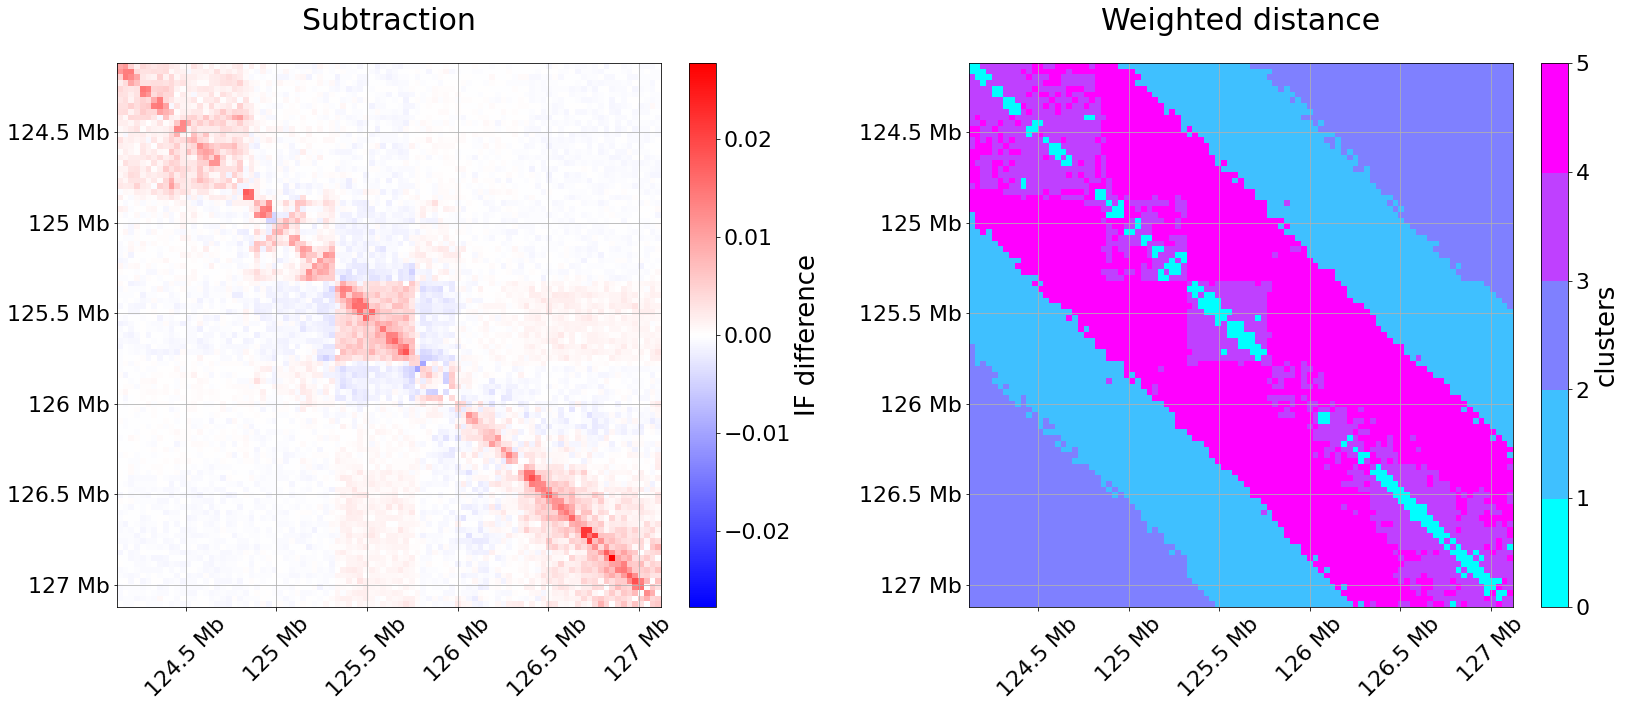

In [9]:
f, axs = plt.subplots(figsize=(28, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
vmax = np.nanmax(abs(sub))
im = ax.matshow(sub,
                vmax=vmax,
                vmin=-vmax,
                cmap='bwr',
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='IF difference', ax=ax)
ax.grid(b=True)
ax.set(title='Subtraction')
pplot.format_ticks(ax)

ax = axs[1]

# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax.matshow(labels_mat,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
ax.grid(b=True)
ax.set(title='Weighted distance')
pplot.format_ticks(ax)
plt.savefig(f'../../Figures/Clusters/{REGION}_sub_cluster.png')

## Division

In [40]:
# load dataset
div = np.load(os.path.join(PATH, 'div_' + REGION + '.npy'))

# dissimilarity matrix
diss_div = DissimilarityMatrix(np.log(div))

<ipython-input-40-3b99e30fd429>:5: RuntimeWarning: divide by zero encountered in log
  diss_div = DissimilarityMatrix(np.log(div))


In [41]:
# interactions difference
interactions_dist = diss_div.scipy_dist(metric='interactions_dist', col1=0, col2=3)

# diagonal distance
diagonal_dist = diss_div.scipy_dist(metric='diagonal_dist', col1=0, col2=3)

In [42]:
# calculate weighted distance matrix
w1 = 1
w2 = 0.01

dist_mat = w1*interactions_dist + w2*diagonal_dist

In [43]:
### calculate kmedoids clusters
medoids = 5
random_state = 19

n = diss_sub.n
triu_nan_idx = diss_div.nan_idx_triu

# find clusters using k-medoids
kmedoids = KMedoids(dist_mat)
cluster_result = kmedoids.clusters(medoids=medoids, random_state=random_state)
labels_mat = kmedoids.labels4plotting_nan(n, triu_nan_idx)

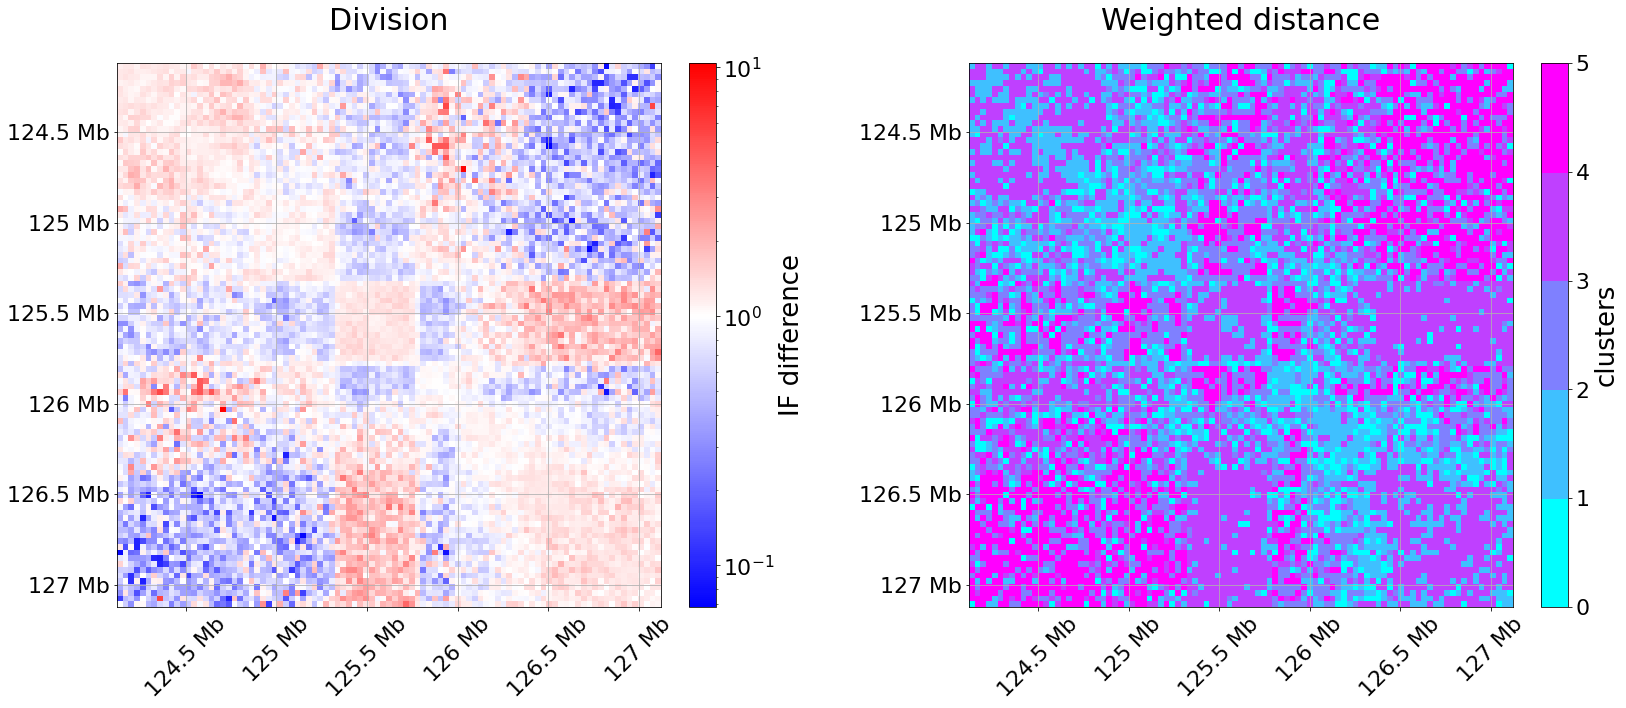

In [44]:
f, axs = plt.subplots(figsize=(28, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
im = ax.matshow(div,
                norm=MidPointLogNorm(midpoint=1),
                cmap='bwr',
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='IF difference', ax=ax)
ax.grid(b=True)
ax.set(title='Division')
pplot.format_ticks(ax)

ax = axs[1]

# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax.matshow(labels_mat,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
ax.grid(b=True)
ax.set(title='Weighted distance')
pplot.format_ticks(ax)
plt.savefig(f'../../Figures/Clusters/{REGION}_div_log_e_cluster.png')

## Pseudocount

In [30]:
# load datasets
pseudo_1 = np.load(os.path.join(PATH, 'pseudo_1_' + REGION + '.npy'))
pseudo_01 = np.load(os.path.join(PATH, 'pseudo_01_' + REGION + '.npy'))
pseudo_001 = np.load(os.path.join(PATH, 'pseudo_001_' + REGION + '.npy'))

# dissimilarity matrix
diss_pseudo_1 = DissimilarityMatrix(np.log(pseudo_001))
diss_pseudo_01 = DissimilarityMatrix(np.log(pseudo_01))
diss_pseudo_001 = DissimilarityMatrix(np.log(pseudo_001))

In [31]:
# interactions difference
intr_pseudo_1 = diss_pseudo_1.scipy_dist(metric='interactions_dist', col1=0, col2=3)

# diagonal distance
diag_pseudo_1 = diss_pseudo_1.scipy_dist(metric='diagonal_dist', col1=0, col2=3)

In [32]:
# calculate weighted distance matrix
w1 = 1
w2 = 0.01

dist_pseudo_1 = w1*intr_pseudo_1 + w2*diag_pseudo_1

In [33]:
### calculate kmedoids clusters
medoids = 5
random_state = 19

n = diss_pseudo_1.n
triu_nan_idx = diss_pseudo_1.nan_idx_triu

# find clusters using k-medoids
kmedoids_pseudo_1 = KMedoids(dist_pseudo_1)
cluster_result_pseudo_1 = kmedoids_pseudo_1.clusters(medoids=medoids, random_state=random_state)
labels_mat_pseudo_1 = kmedoids_pseudo_1.labels4plotting_nan(n, triu_nan_idx)

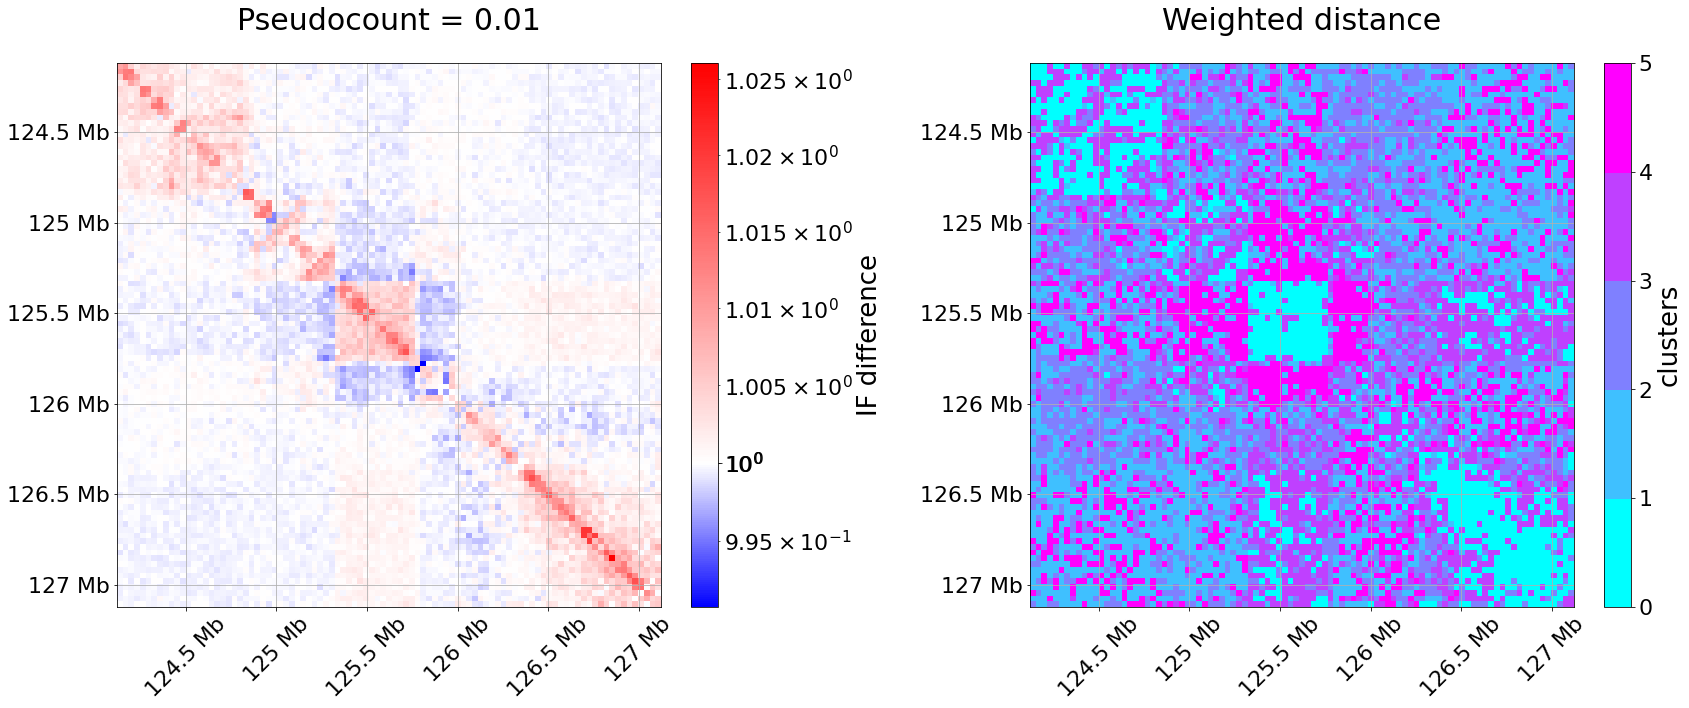

In [34]:
f, axs = plt.subplots(figsize=(30, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
im = ax.matshow(np.ma.masked_invalid(pseudo_1),
                norm=MidPointLogNorm(midpoint=1),
                cmap='bwr',
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='IF difference', ax=ax)
ax.grid(b=True)
ax.set(title='Pseudocount = 0.01')
pplot.format_ticks(ax)

ax = axs[1]

# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

im = ax.matshow(labels_mat_pseudo_1,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
ax.grid(b=True)
ax.set(title='Weighted distance')
pplot.format_ticks(ax)
plt.savefig(f'../../Figures/Clusters/{REGION}_pseudo_001_cluster.png')

## Relative difference

In [20]:
# load dataset
rel = np.load(os.path.join(PATH, 'rel_' + REGION + '.npy'))

# dissimilarity matrix
diss_rel = DissimilarityMatrix(rel)

In [21]:
# interactions difference
interactions_dist = diss_rel.scipy_dist(metric='interactions_dist', col1=0, col2=3)

# diagonal distance
diagonal_dist = diss_rel.scipy_dist(metric='diagonal_dist', col1=0, col2=3)

In [22]:
# calculate weighted distance matrix
w1 = 1
w2 = 0.01

dist_mat = w1*interactions_dist + w2*diagonal_dist

In [23]:
### calculate kmedoids clusters
medoids = 5
random_state = 19

n = diss_sub.n
triu_nan_idx = diss_rel.nan_idx_triu

# find clusters using k-medoids
kmedoids = KMedoids(dist_mat)
cluster_result = kmedoids.clusters(medoids=medoids, random_state=random_state)
labels_mat = kmedoids.labels4plotting_nan(n, triu_nan_idx)

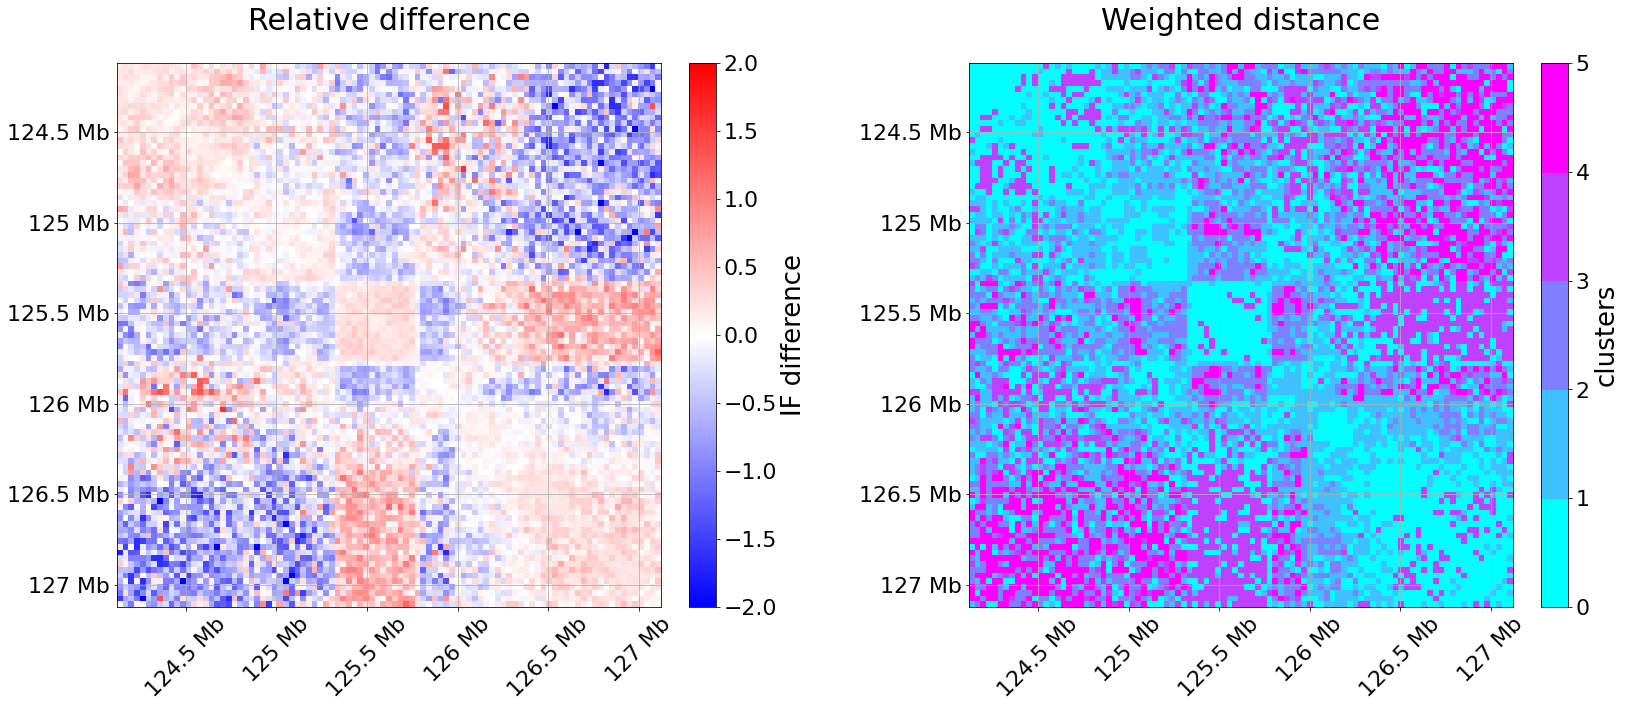

In [24]:
# create discrete colormap
cmap = plt.cm.cool
bounds = np.linspace(0, medoids, medoids+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

f, axs = plt.subplots(figsize=(28, 10),
                      nrows=1,
                      ncols=2,
                      sharex=True, sharey=False)

ax = axs[0]
vmax = np.nanmax(abs(rel))
im = ax.matshow(rel,
                vmax=vmax,
                vmin=-vmax,
                cmap='bwr',
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='IF difference', ax=ax)
ax.grid(b=True)
ax.set(title='Relative difference')
pplot.format_ticks(ax)

ax = axs[1]
im = ax.matshow(labels_mat,
                norm=norm,
                cmap=cmap,
                alpha=1,
                extent=EXTENT)
plt.colorbar(im, fraction=0.046, pad=0.04, label='clusters', ax=ax)
ax.grid(b=True)
ax.set(title='Weighted distance')
pplot.format_ticks(ax)
plt.savefig(f'../../Figures/Clusters/{REGION}_rel_cluster.png')